In [63]:
from sklearn.linear_model import LinearRegression;
from sklearn.model_selection import train_test_split;
from sklearn.metrics import mean_absolute_error;
from sklearn.metrics import mean_squared_error;
import pandas as pan;
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plotter;
import scipy as scp;
from joblib import dump, load;

In [2]:
matrix_data = pan.read_csv("Advertising.csv");

In [3]:
print(matrix_data.head(5));

      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


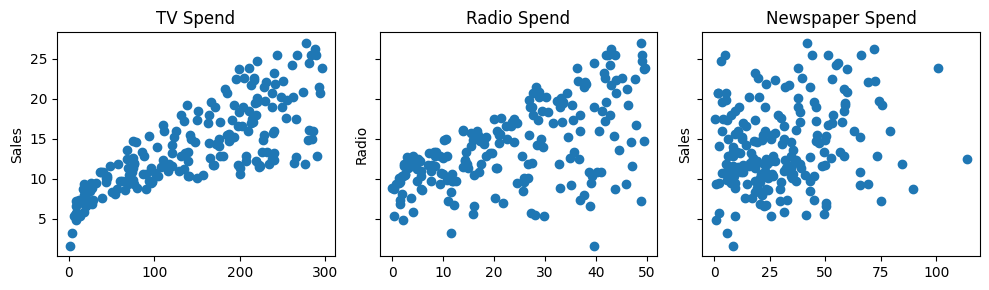

In [6]:
#exploring the relationship between the data
figure, axes = plotter.subplots(nrows = 1, ncols = 3, sharey= True, figsize = (10, 3));

axes[0].plot(matrix_data["TV"], matrix_data["sales"], "o");
axes[0].set_ylabel("Sales");
axes[0].set_title("TV Spend");

axes[1].plot(matrix_data["radio"], matrix_data["sales"], "o");
axes[1].set_ylabel("Radio");
axes[1].set_title("Radio Spend");

axes[2].plot(matrix_data["newspaper"], matrix_data["sales"], "o");
axes[2].set_ylabel("Sales");
axes[2].set_title("Newspaper Spend");
plotter.tight_layout();

In [7]:
#seperating into features and labels
features = matrix_data[["TV", "radio", "newspaper"]];

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [8]:
label = matrix_data["sales"];

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [9]:
#splitting the data into training and testing sets
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.3, random_state=42);

In [13]:
#writing the model/estimator
learner = LinearRegression(n_jobs = 4);

In [14]:
learner.fit(feature_train, label_train)

LinearRegression(n_jobs=4)

In [27]:
label_predictions = learner.predict(feature_test)

In [20]:
print(feature_test.head());
print(label_test.head());

        TV  radio  newspaper
95   163.3   31.6       52.9
15   195.4   47.7       52.9
30   292.9   28.3       43.2
158   11.7   36.9       45.2
128  220.3   49.0        3.2
95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: sales, dtype: float64


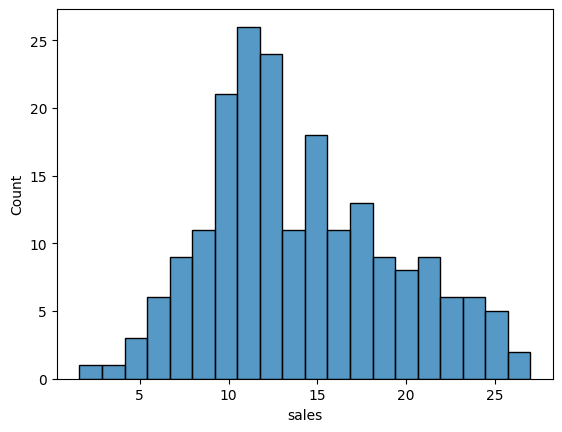

In [26]:
sns.histplot(x = matrix_data["sales"], bins = 20);

In [29]:
#MAE(mean absolute error)
print(mean_absolute_error(label_test, label_predictions));

1.5116692224549086


In [32]:
#MSE (mean squared error)
print(mean_squared_error(label_test, label_predictions));

3.79679723671522


In [33]:
#RMSE (root mean squared error)
print(np.sqrt(mean_squared_error(label_test, label_predictions)));

1.9485372043446387


In [40]:
residuals = label_test - label_predictions;

In [42]:
residuals

95     0.334604
15     1.211772
30    -0.151071
158   -3.589238
128    2.497680
115   -0.755569
69     1.103075
170    1.049715
174   -1.775471
45    -0.224495
66     0.485570
182    2.174572
165   -2.402060
78    -3.670260
186    0.843204
177   -0.304544
56    -3.415494
152    0.443807
82     1.004171
68     0.175264
124   -0.068218
16    -1.274690
148   -1.596389
93     0.664982
65     1.691393
60     2.488020
84     0.782405
67     1.593723
125    1.519234
132   -2.814120
9     -1.576049
18     1.330806
55     1.969910
75    -4.077706
150   -2.001136
104    0.624092
135   -2.662026
137   -0.138265
164    1.060612
76     2.518094
79     1.486676
197    0.395137
38    -0.070454
24     1.609186
122   -1.563884
195    2.375645
29     1.211062
19     0.506693
143    1.709755
86     0.338802
114   -1.118484
173    0.068431
5     -6.153607
126   -4.553147
117    3.063632
73     1.238420
140    1.480429
98     1.144835
172   -0.095191
96    -0.453176
Name: sales, dtype: float64

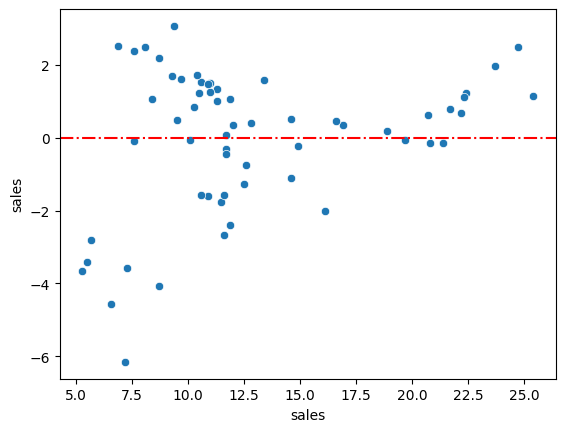

In [46]:
sns.scatterplot(x = label_test, y= residuals);
plotter.axhline(y = 0, color = "red", ls = "-.");

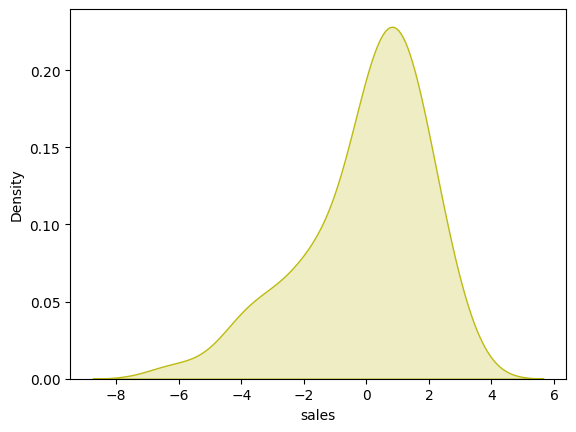

In [51]:
sns.kdeplot(x = residuals, fill =True, color = "#BCBB11".lower());

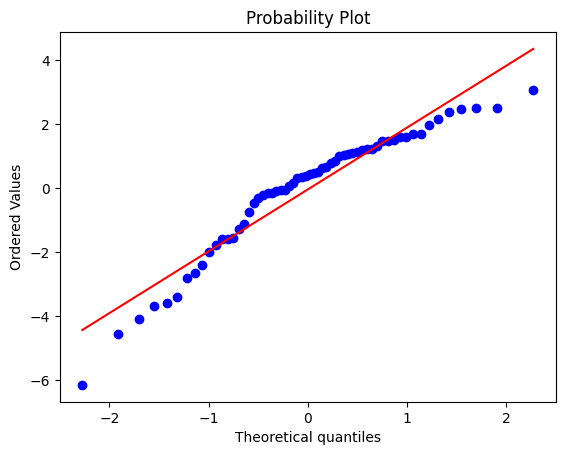

In [54]:
#check how the residuals look against a normal distribution...if they are a good estimation, then you're good!
figure, ax = plotter.subplots(dpi = 100);
_ = scp.stats.probplot(residuals, plot = ax);

In [55]:
#model deployment
graduate_learner = LinearRegression(n_jobs = 4);

In [57]:
graduate_learner.fit(features, label);

In [58]:
#coefficients of the model
graduate_learner.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [59]:
y_hat = graduate_learner.predict(features);

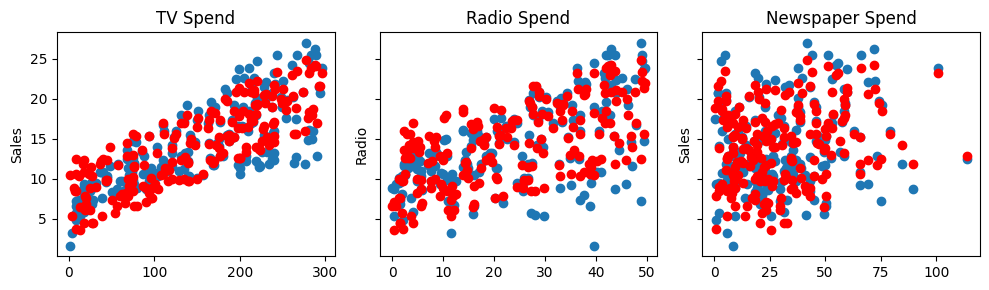

In [62]:
figure, axes = plotter.subplots(nrows = 1, ncols = 3, sharey= True, figsize = (10, 3));

axes[0].plot(matrix_data["TV"], matrix_data["sales"], "o");
axes[0].plot(matrix_data["TV"], y_hat, "o", color = "red");
axes[0].set_ylabel("Sales");
axes[0].set_title("TV Spend");

axes[1].plot(matrix_data["radio"], matrix_data["sales"], "o");
axes[1].plot(matrix_data["radio"], y_hat, "o", color = "red");
axes[1].set_ylabel("Radio");
axes[1].set_title("Radio Spend");

axes[2].plot(matrix_data["newspaper"], matrix_data["sales"], "o");
axes[2].plot(matrix_data["newspaper"], y_hat, "o", color = "red");
axes[2].set_ylabel("Sales");
axes[2].set_title("Newspaper Spend");
plotter.tight_layout();

In [64]:
dump(graduate_learner, "graduate_learner.joblib");

In [65]:
#loading the model
loaded_model = load("graduate_learner.joblib");

In [67]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])